In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv('Credit Score Classification Dataset.csv')

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [5]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [6]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [9]:
df.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [10]:
le = LabelEncoder()

In [11]:
cols = df.select_dtypes(include = 'object').columns.tolist()

In [12]:
cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [13]:
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])

X1 contains ALL of our predictors, including Age, Gender, Income, Education, Marital Status, Number of Children,
and Home Ownership.  

X2 contains the same predictors as X1 EXCEPT Gender.

In [15]:
X1 = df.drop('Credit Score', axis = 1)
X2 = X1.drop('Gender', axis = 1)
y = df['Credit Score']

In [16]:
print(X1)
print(X2)

     Age  Gender  Income  Education  Marital Status  Number of Children  \
0     25       0   50000          1               1                   0   
1     30       1  100000          4               0                   2   
2     35       0   75000          2               0                   1   
3     40       1  125000          3               1                   0   
4     45       0  100000          1               0                   3   
..   ...     ...     ...        ...             ...                 ...   
159   29       0   27500          3               1                   0   
160   34       1   47500          0               1                   0   
161   39       0   62500          1               0                   2   
162   44       1   87500          4               1                   0   
163   49       0   77500          2               0                   1   

     Home Ownership  
0                 1  
1                 0  
2                 0  
3          

In [17]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
X2_train, X2_test = X1_train.drop(['Gender'], axis=1), X1_test.drop(['Gender'], axis=1)

Define parameter grid for the grid search. The search compares different specified parameters for our estimator, then performs cross validation.  
This compares three LDA solvers:  
Singular Value Decomposition  
Least Squares Solution  
Eigenvalue Decomposition

In [25]:
param_grid = {
    'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen']
}

Search through the parameters to find the optimal solver. Then perform 5-fold cross validation.

In [26]:
lda1 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
grid_search1 = GridSearchCV(lda1, param_grid=param_grid)
grid_search1.fit(X1_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             param_grid={'lineardiscriminantanalysis__solver': ['svd', 'lsqr',
                                                                'eigen']})

In [27]:
best_lda1 = grid_search1.best_estimator_
best_score1 = grid_search1.best_score_
best_params1 = grid_search1.best_params_

In [28]:
print("Optimal Model:", best_lda1)
print("")
print("Most accurate Cross-Validation Score:", best_score1)
print("")
print("Optimal Grid Search Parameters:", best_params1)

Optimal Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

Most accurate Cross-Validation Score: 0.8937321937321938

Optimal Grid Search Parameters: {'lineardiscriminantanalysis__solver': 'svd'}


Now we fit and compare the model WITHOUT the gender parameter.

In [44]:
lda2 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
grid_search2 = GridSearchCV(lda2, param_grid=param_grid)
grid_search2.fit(X2_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             param_grid={'lineardiscriminantanalysis__solver': ['svd', 'lsqr',
                                                                'eigen']})

In [45]:
best_lda2 = grid_search2.best_estimator_
best_score2 = grid_search2.best_score_
best_params2 = grid_search2.best_params_

In [46]:
print("WITHOUT gender parameter:")
print("")
print("Optimal Model:", best_lda2)
print("")
print("Most accurate Cross-Validation Score:", best_score2)
print("")
print("Optimal Grid Search Parameters:", best_params2)

WITHOUT gender parameter:

Optimal Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

Most accurate Cross-Validation Score: 0.9085470085470085

Optimal Grid Search Parameters: {'lineardiscriminantanalysis__solver': 'svd'}


<font size = "5">__Evaluation Metrics__

In [32]:
yhat_train1, yhat_test1 = best_lda1.predict(X1_train), best_lda1.predict(X1_test)
yhat_train2, yhat_test2 = best_lda2.predict(X2_train), best_lda2.predict(X2_test)

In [33]:
def train_test_predictions(model, X_tr, y_tr, X_te):
    model.fit(X_tr,y_tr)
    return model.predict(X_tr), model.predict(X_te)

def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)
    
    target_names = ['High', 'Medium', 'Low']
    
    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te, target_names=target_names))
    print()

    with sns.axes_style('darkgrid'):
        cm = confusion_matrix(y_te, yhat_te)
        print("Confusion matrix:")
        print(cm)
        pl.matshow(cm)
        pl.title('Confusion matrix of the %s classifier' % named)
        pl.colorbar()
        plt.show()

training set accuracy (n=131): 0.878
test set accuracy (n=33): 0.909

classificiation report on test set performance
              precision    recall  f1-score   support

        High       1.00      0.57      0.73         7
      Medium       0.96      1.00      0.98        23
         Low       0.60      1.00      0.75         3

    accuracy                           0.91        33
   macro avg       0.85      0.86      0.82        33
weighted avg       0.93      0.91      0.90        33


Confusion matrix:
[[ 4  1  2]
 [ 0 23  0]
 [ 0  0  3]]


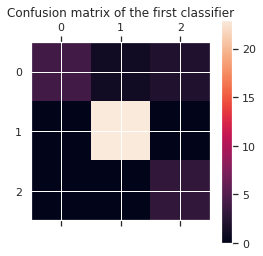

In [34]:
show_metrics(y_train, y_test, yhat_train1, yhat_test1, 'first')

training set accuracy (n=131): 0.924
test set accuracy (n=33): 0.970

classificiation report on test set performance
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
      Medium       0.96      1.00      0.98        23
         Low       1.00      1.00      1.00         3

    accuracy                           0.97        33
   macro avg       0.99      0.95      0.97        33
weighted avg       0.97      0.97      0.97        33


Confusion matrix:
[[ 6  1  0]
 [ 0 23  0]
 [ 0  0  3]]


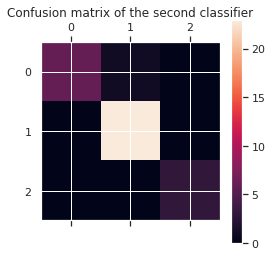

In [36]:
show_metrics(y_train, y_test, yhat_train2, yhat_test2, 'second')

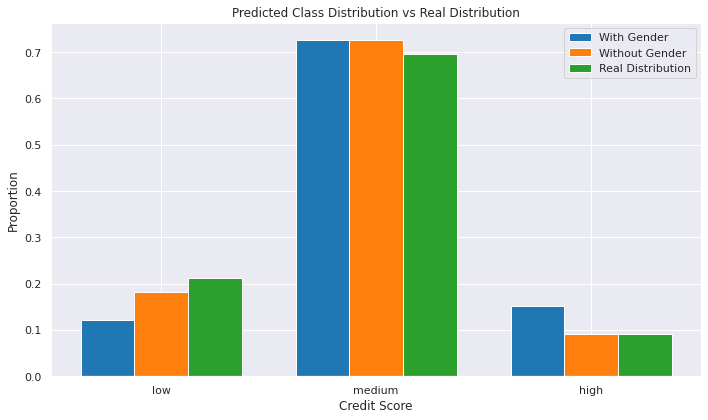

In [41]:
class_labels = ['low', 'medium', 'high']
pred_dist1 = pd.Series(yhat_test1).value_counts(normalize=True).sort_index()
pred_dist2 = pd.Series(yhat_test2).value_counts(normalize=True).sort_index()
real_dist = y_test.value_counts(normalize=True).sort_index()

bar_width = 0.25
index = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(index, pred_dist1, width=bar_width, label='With Gender')
plt.bar(index + bar_width, pred_dist2, width=bar_width, label='Without Gender')
plt.bar(index + 2*bar_width, real_dist, width=bar_width, label='Real Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Proportion')
plt.title('Predicted Class Distribution vs Real Distribution')
plt.xticks(index + bar_width, class_labels)
plt.legend()
plt.tight_layout()
plt.show()